In [133]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/label.txt          
  inflating: data/input_data.txt     
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._input_data.txt  


In [3]:
import tensorflow 
from tensorflow import keras
import numpy as np

In [134]:
INPUT_FILE_PATH = './data/input_data.txt'
LABEL_FILE_PATH = './data/label.txt'
DATA_SIZE = 15000

def _str_to_float_list(l):
  for i in range(len(l)):
    l[i] = float(l[i])
  return l

# Read data from a text file
def prepare_data(filename):
  input_data = []
  with open(filename, 'r') as f:
    lines = f.readlines()
    for line in lines:
      data = line.split()
      data = _str_to_float_list(data)
      input_data.append(data)
  return input_data

input_data = prepare_data(INPUT_FILE_PATH)
labels = prepare_data(LABEL_FILE_PATH)
input_data = np.array(input_data)
labels = np.array(labels)

# Shuffle the data
indices_permutation = np.random.permutation(len(input_data))
shuffled_input_data = input_data[indices_permutation]
shuffled_labels = labels[indices_permutation]

input_data = input_data[:DATA_SIZE]
labels = labels[:DATA_SIZE]


print(f"Number of input data: {len(input_data)}")
print(f"Number of label data: {len(labels)}")

Number of input data: 15000
Number of label data: 15000


In [135]:
# Split data into training and validation set
x_train = input_data[:12000]
y_train = labels[:12000]
y_train = np.reshape(y_train, (-1,))

x_val = input_data[12000:]
y_val = labels[12000:]
y_val = np.reshape(y_val, (-1,))

print(f"Shape of training data: {x_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of validation data: {x_val.shape}")
print(f"Shape of valiation labels: {y_val.shape}")

Shape of training data: (12000, 5)
Shape of training labels: (12000,)
Shape of validation data: (3000, 5)
Shape of valiation labels: (3000,)


In [136]:
def build_model():
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(16, activation='relu', input_shape=(5,)))
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer= keras.optimizers.Adam(),
              loss= keras.losses.BinaryCrossentropy(),
              metrics=keras.metrics.BinaryAccuracy())
  return model

model = build_model()

In [137]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 16)                96        
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [138]:
history = model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_val, y_val))

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 3.0773 - binary_accuracy: 0.8000 - val_loss: 0.0528 - val_binary_accuracy: 0.9780
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0258 - binary_accuracy: 0.9943 - val_loss: 0.0053 - val_binary_accuracy: 1.0000
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0074 - binary_accuracy: 0.9998 - val_loss: 0.0018 - val_binary_accuracy: 1.0000
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0038 - binary_accuracy: 0.9998 - val_loss: 8.7226e-04 - val_binary_accuracy: 1.0000
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0026 - binary_accuracy: 0.9998 - val_loss: 4.5267e-04 - val_binary_accuracy: 1.0000
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0020 - binary_accuracy: 0.9998 - val_loss: 2.3960e-04 - val_binary_accuracy: 1.0000
Epoch 7/10
750/750 [==============================] 

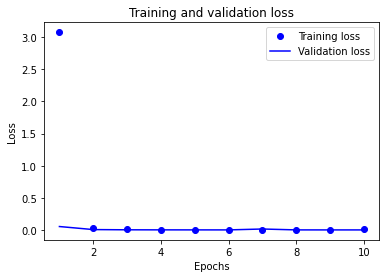

In [139]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [140]:
model.save_weights('model_weights.h5')